In [10]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key 
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [7]:
# # Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a2833f45fec3b0a1861052461ce24130


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers and the city.
    print(f"Processing Record {record_count } of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | kondratovo
Processing Record 3 of Set 1 | kintampo
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | rozmital pod tremsinem
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | wewak
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | benguela
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | high level
Processing Record 21 of Set 1 | sorland
Processing Record 22 of Set 1 | bluff
Processing Recor

Processing Record 35 of Set 4 | rio grande
Processing Record 36 of Set 4 | anchorage
Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 4 | san patricio
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | batagay-alyta
Processing Record 42 of Set 4 | barcelos
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | asosa
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | pisco
City not found. Skipping...
Processing Record 2 of Set 5 | levelland
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | chicama
Processing Record 6 of Set 5 | bogorodskoye
Processing Record 7 of Set 

Processing Record 21 of Set 8 | gwadar
Processing Record 22 of Set 8 | muros
Processing Record 23 of Set 8 | villa maria
Processing Record 24 of Set 8 | faxinal
Processing Record 25 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 26 of Set 8 | adrar
Processing Record 27 of Set 8 | anadyr
Processing Record 28 of Set 8 | sirajganj
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | kozhva
Processing Record 31 of Set 8 | port augusta
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | eureka
Processing Record 34 of Set 8 | honningsvag
Processing Record 35 of Set 8 | santa maria
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | flinders
Processing Record 40 of Set 8 | victoria point
Processing Record 41 of Set 8 | pontianak
Processing Record 42 of Set 8 | goryachiy klyuch
Processing Record 43 of Set 8 | tiksi
Processing

Processing Record 8 of Set 12 | cumadcad
Processing Record 9 of Set 12 | the pas
Processing Record 10 of Set 12 | mahanoro
Processing Record 11 of Set 12 | moree
Processing Record 12 of Set 12 | merrill
Processing Record 13 of Set 12 | nantucket
Processing Record 14 of Set 12 | taywarah
Processing Record 15 of Set 12 | badiraguato
Processing Record 16 of Set 12 | manggar
Processing Record 17 of Set 12 | tubuala
Processing Record 18 of Set 12 | labutta
City not found. Skipping...
Processing Record 19 of Set 12 | northam
Processing Record 20 of Set 12 | kasempa
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 23 of Set 12 | hare bay
Processing Record 24 of Set 12 | todos santos
Processing Record 25 of Set 12 | dogondoutchi
Processing Record 26 of Set 12 | bongandanga
Processing Record 27 of Set 12 | obigarm
Processing Record 28 of Set 12 | acajutla
Processing Record 29 of Set 12 | mogadishu
Processing Record 30 of Set

In [17]:
x = len(city_data)
x

566

In [19]:
# convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,78.80,89,40,8.05,AU,2021-04-01 18:20:58
1,Kondratovo,57.9804,56.1066,35.60,100,90,8.95,RU,2021-04-01 18:23:12
2,Kintampo,8.0563,-1.7306,90.28,35,59,8.41,GH,2021-04-01 18:23:13
3,Fortuna,40.5982,-124.1573,64.99,87,1,3.44,US,2021-04-01 18:23:13
4,Rozmital Pod Tremsinem,49.6020,13.8643,60.01,100,77,7.25,CZ,2021-04-01 18:23:14
5,Kodiak,57.7900,-152.4072,23.00,42,1,29.93,US,2021-04-01 18:20:49
6,Albany,42.6001,-73.9662,37.99,65,100,8.01,US,2021-04-01 18:21:34
7,Butaritari,3.0707,172.7902,82.44,78,37,15.03,KI,2021-04-01 18:23:16
8,Wewak,-3.5534,143.6268,78.66,86,97,3.31,PG,2021-04-01 18:23:16
9,Cidreira,-30.1811,-50.2056,72.88,61,28,9.35,BR,2021-04-01 18:23:17


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-04-01 18:20:58,-24.8667,113.6333,78.80,89,40,8.05
1,Kondratovo,RU,2021-04-01 18:23:12,57.9804,56.1066,35.60,100,90,8.95
2,Kintampo,GH,2021-04-01 18:23:13,8.0563,-1.7306,90.28,35,59,8.41
3,Fortuna,US,2021-04-01 18:23:13,40.5982,-124.1573,64.99,87,1,3.44
4,Rozmital Pod Tremsinem,CZ,2021-04-01 18:23:14,49.6020,13.8643,60.01,100,77,7.25
...,...,...,...,...,...,...,...,...,...
561,Zeya,RU,2021-04-01 18:27:29,53.7500,127.2667,26.55,96,100,2.77
562,Burns Lake,CA,2021-04-01 18:27:29,54.2331,-125.7533,35.60,38,48,13.80
563,Sao Luiz Gonzaga,BR,2021-04-01 18:27:30,-28.4083,-54.9608,75.70,47,7,6.67
564,Cravo Norte,CO,2021-04-01 18:27:30,6.3017,-70.2041,90.16,41,95,6.15


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

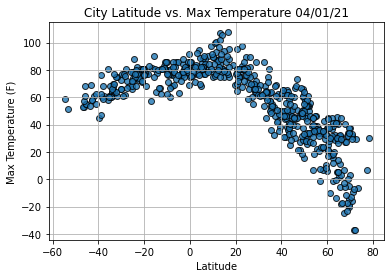

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

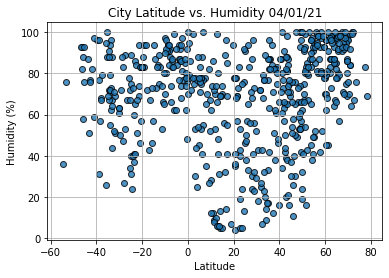

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

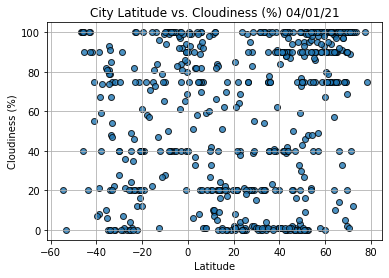

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

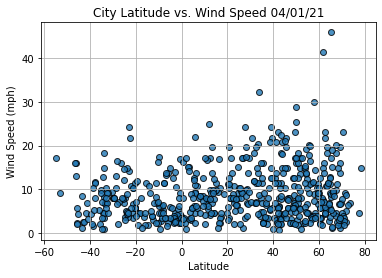

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2021-04-01 18:20:52
Lat                       19.7297
Lng                       -155.09
Max Temp                    69.01
Humidity                       94
Cloudiness                     20
Wind Speed                   4.61
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kondratovo,RU,2021-04-01 18:23:12,57.9804,56.1066,35.60,100,90,8.95
2,Kintampo,GH,2021-04-01 18:23:13,8.0563,-1.7306,90.28,35,59,8.41
3,Fortuna,US,2021-04-01 18:23:13,40.5982,-124.1573,64.99,87,1,3.44
4,Rozmital Pod Tremsinem,CZ,2021-04-01 18:23:14,49.6020,13.8643,60.01,100,77,7.25
5,Kodiak,US,2021-04-01 18:20:49,57.7900,-152.4072,23.00,42,1,29.93


In [38]:
# Create a Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

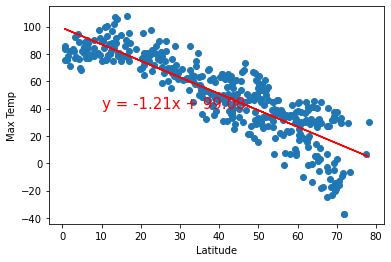

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

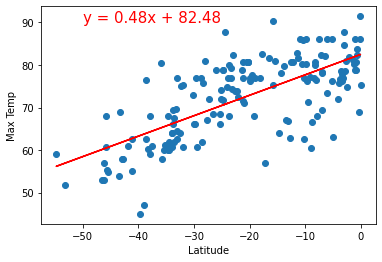

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

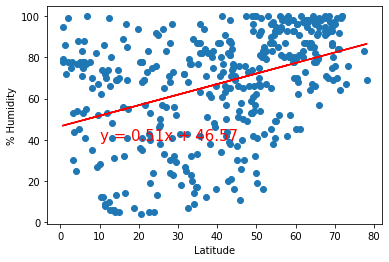

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

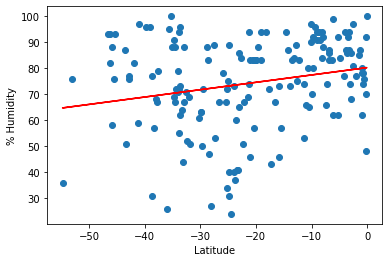

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

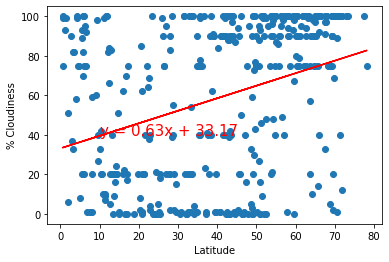

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

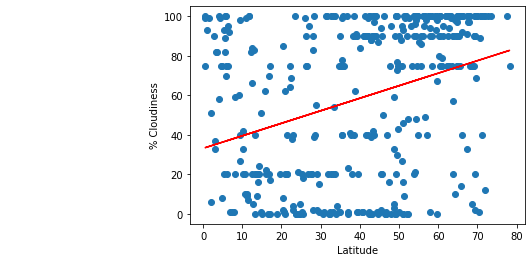

In [52]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

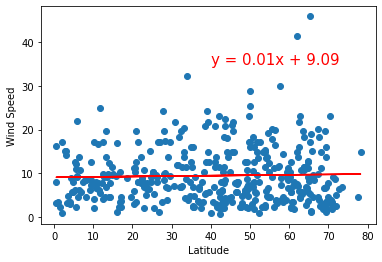

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function. 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

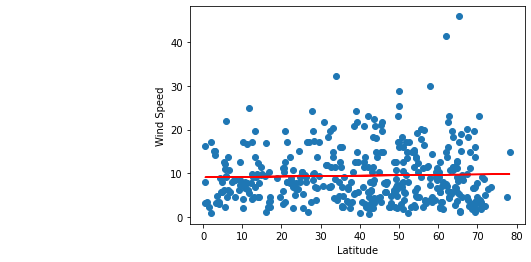

In [58]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))